In [109]:
# Importing Pandas and NumPy
import os 
import itertools
import requests, json
import pprint 
import warnings
warnings.filterwarnings('ignore') # Suppressing Warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline
import seaborn as sns


#import pandas_profiling as pf

from sklearn.preprocessing import scale

from sklearn.cluster import KMeans

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [110]:
df=pd.read_csv('Leads.csv', encoding = "ISO-8859-1")
df.head(5) 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [111]:
print(len(df))

9240


In [112]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [114]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [115]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [116]:
#checking duplicates
sum(df.duplicated(subset = 'Prospect ID')) == 0
# No duplicate values

True

In [117]:
#Finding the missing values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [118]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [119]:
#Removing columns which have all null values
df=df.dropna(axis=1, how='all')
#Removing rows which have all null values
df=df.dropna(axis=0, how='all')

In [120]:
#Finding the number which would explain 30% of row data
11/df.shape[1]*100

29.72972972972973

In [121]:
#Deleting rows which have more than 30% null values
df=df.dropna(thresh=26)

In [122]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.42
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.59
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.59
Last Activity                                     1.20
Country                                          23.89
Specialization                                    9.24
How did you hear about X Education               18.17
What is your current occupation                  23.79
What matters most to you in choosing a course    24.01
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [123]:
df['Asymmetrique Activity Score'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

(array([   5.,    9.,   57.,   95.,  196.,  775., 1771., 1293.,  467.,
         354.]),
 array([ 7. ,  8.1,  9.2, 10.3, 11.4, 12.5, 13.6, 14.7, 15.8, 16.9, 18. ]),
 <a list of 10 Patch objects>)

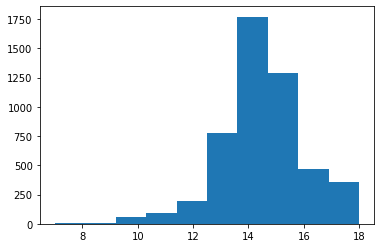

In [124]:
plt.hist(df['Asymmetrique Activity Score'])

In [125]:
#Filling the missing values for Asymmetrique Activity Score with median values
df['Asymmetrique Activity Score'].fillna(int(df['Asymmetrique Activity Score'].mean()),inplace=True)
#Filling the missing values for Asymmetrique Profile Score with median values
df['Asymmetrique Profile Score'].fillna(int(df['Asymmetrique Profile Score'].mean()),inplace=True)
#Replace null values for Lead Qua;ity column with 'Not sure'
df['Lead Quality'].fillna('Not Sure',inplace=True)
#Replace Values for City which is given as Select
df['City']=np.where(df['City'].str.contains('Select'),'Other Cities',df['City'])
#Replacing null values for country based on City variable
df['Country']=np.where(df['Country'].str.contains('Mumbai|Thane|Maharashtra'),'India',df['Country'])
#Drop observations with Country variable as null
df.dropna(subset=['Country'],inplace=True)
# Drop null values for City
df.dropna(subset=['City'],inplace=True)
#Replace Null values for 'What is your current occupation' with 'Other'
df['What is your current occupation'].fillna('Other',inplace=True)
#Replace Null values for 'What matters most to you in choosing a course'with 'Other'
df['What matters most to you in choosing a course'].fillna('Other',inplace=True)
#Replace 'Select' values for 'How did you hear about X Education' with 'Other'
df['How did you hear about X Education']=np.where(df['How did you hear about X Education'].str.contains('Select'),'Other',df['How did you hear about X Education'])
#Drop null value observations for 'Lead Source' field
df.dropna(subset=['Lead Source'],inplace=True)
# Drop null value observations for 'Specialization' field
df.dropna(subset=['Specialization'],inplace=True)
#Replace Null Value for Asymmetrique Activity Index based on Mode Value
df['Asymmetrique Activity Index'].fillna('02.Medium',inplace=True)

#Replace Null Value for Asymmetrique Profile Index based on Mode Value
df['Asymmetrique Profile Index'].fillna('02.Medium',inplace=True)

# Replace 'Select' values for 'Lead Profile' with 'Other Leads'
df['Lead Profile']=np.where(df['Lead Profile'].str.contains('Select'),'Other Leads',df['Lead Profile'])

# Replace null values for Tag variable with most frequency variable when conversion rate is 1
df['Tags']=np.where((df['Tags'].isnull() & df['Converted']==1),'Will revert after reading the email',df['Tags'])

# Replace null values for Tag variable with most frequency variable when conversion rate is 0
df['Tags']=np.where((df['Tags'].isnull()),'Ringing',df['Tags'])

# Replace 'Select' values for 'City' with 'Other Cities'
df['City']=np.where(df['City'].str.contains('Select'),'Other Cities',df['City'])

# Replace Nulll Values with their mean values for their respective columns
df['Page Views Per Visit'].fillna(int(df['Page Views Per Visit'].mean()),inplace=True)
df['TotalVisits'].fillna(int(df['TotalVisits'].mean()),inplace=True)

#Drop observations with Last Activity variable as null
df.dropna(subset=['Last Activity'],inplace=True)



In [126]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [127]:
df.to_csv('Leads_cleaned')

In [128]:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

43.07150313152401

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

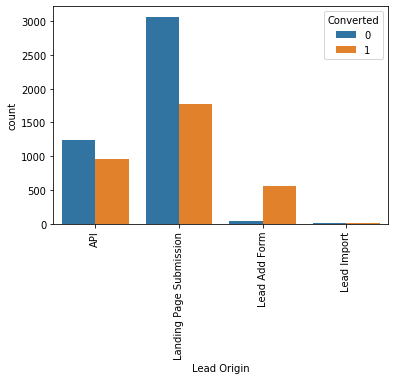

In [129]:
#Lead Origin
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

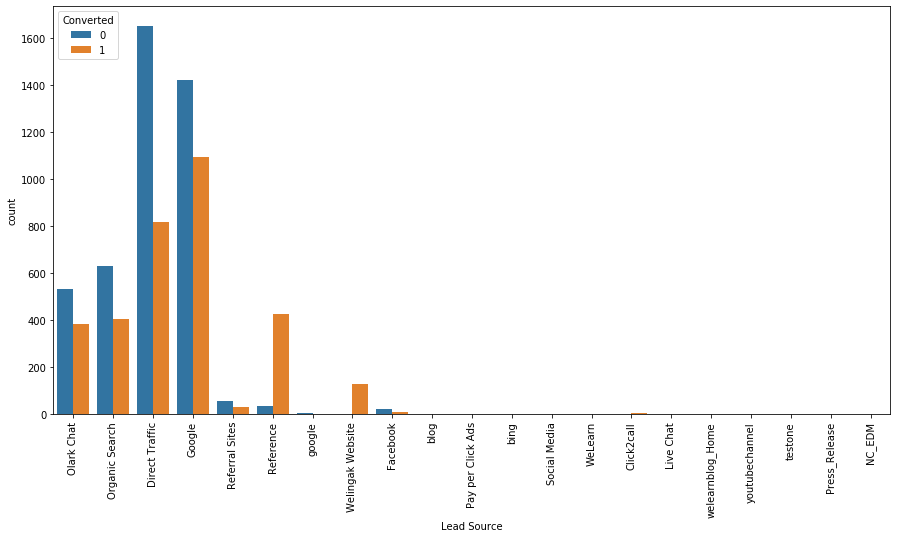

In [130]:
#Lead Source
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)

In [131]:
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

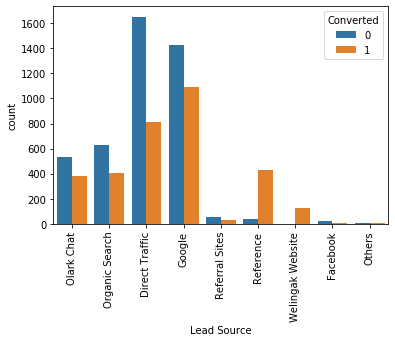

In [132]:
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)

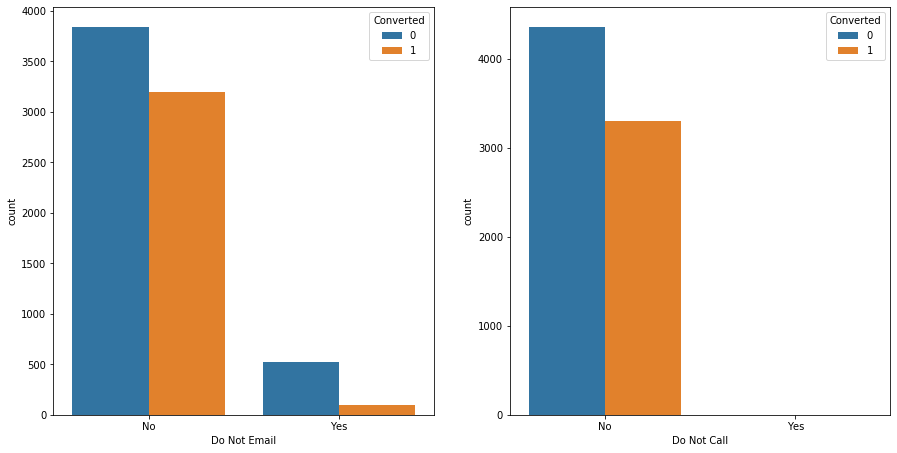

In [133]:
#Dont Email & Dont Call
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df, ax = axs[1])

In [134]:
#Total Visits
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    7664.000000
mean        3.809368
std         5.081670
min         0.000000
5%          0.000000
25%         2.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        18.000000
max       251.000000
Name: TotalVisits, dtype: float64

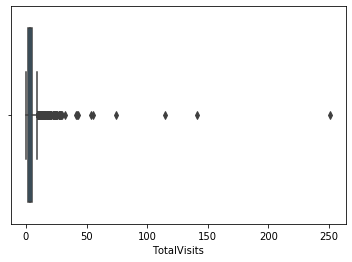

In [135]:
sns.boxplot(df['TotalVisits'])

In [136]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

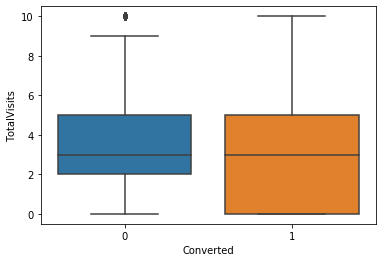

In [137]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)

In [138]:
#Total Time Spent on Website
df['Total Time Spent on Website'].describe()

count    7664.000000
mean      534.454593
std       554.795723
min         0.000000
25%        61.000000
50%       296.000000
75%      1012.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

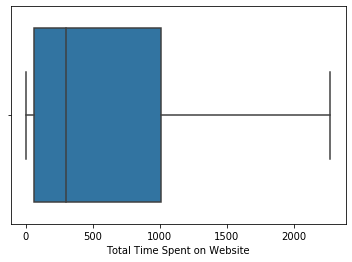

In [139]:
sns.boxplot(df['Total Time Spent on Website'])

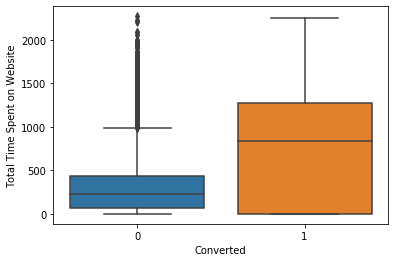

In [140]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)

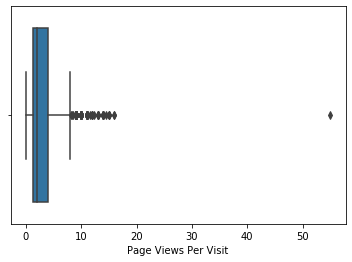

In [141]:
sns.boxplot(df['Page Views Per Visit'])

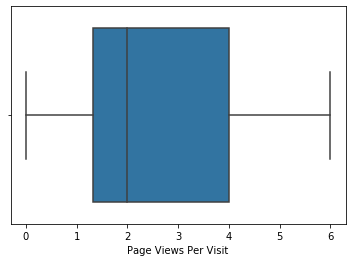

In [142]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]
sns.boxplot(df['Page Views Per Visit'])

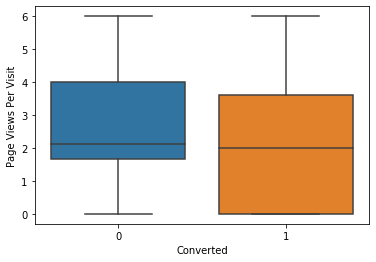

In [143]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

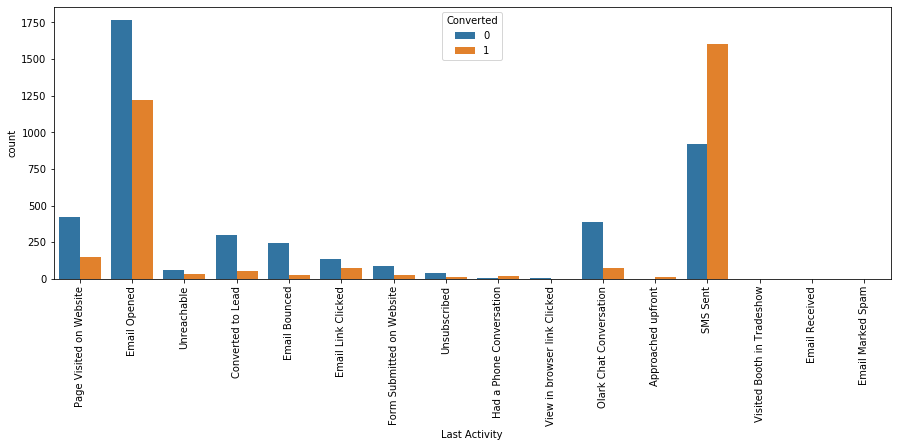

In [144]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
xticks(rotation = 90)

In [145]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

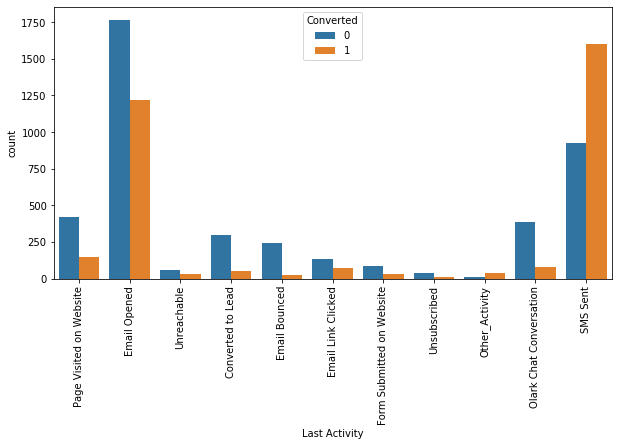

In [146]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

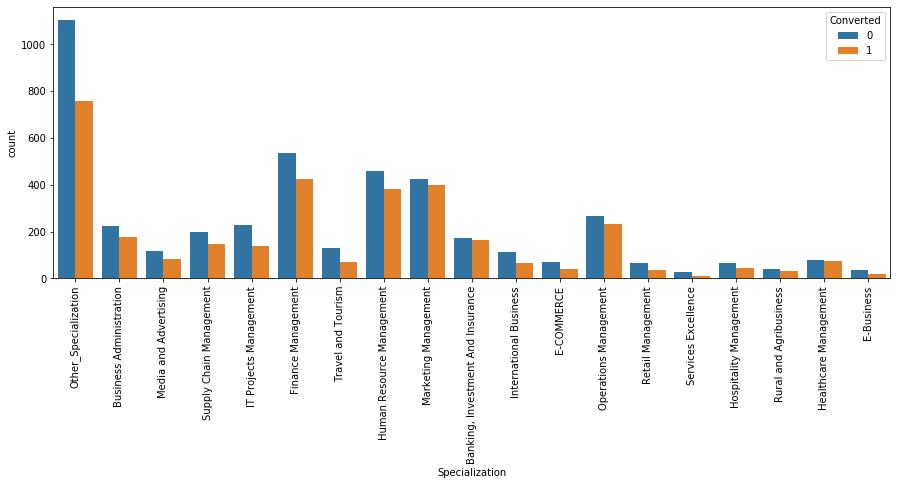

In [147]:
df['Specialization']=np.where(df['Specialization'].str.contains('Select'),'Other_Specialization',df['Specialization'])
df['Specialization'] = df['Specialization'].replace(['Others'], 'Other_Specialization')
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = df)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

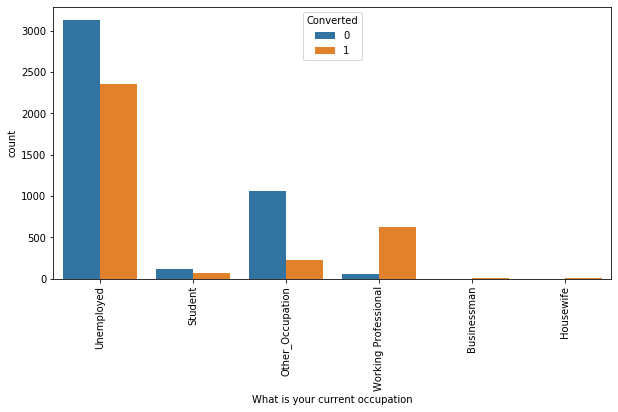

In [148]:
df['What is your current occupation'] = df['What is your current occupation'].replace(['Other'], 'Other_Occupation')
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

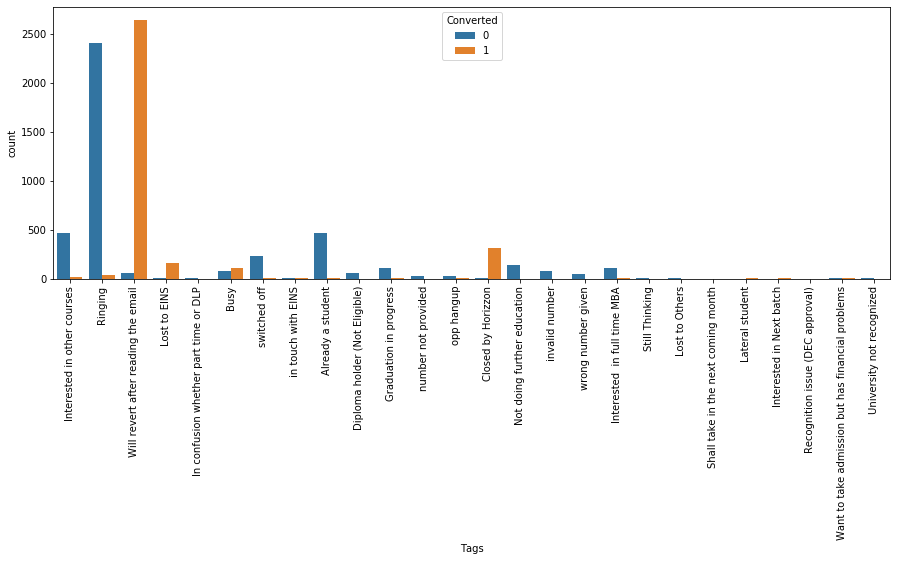

In [149]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = df)
xticks(rotation = 90)

In [150]:
counts = pd.value_counts(df['Tags'])
# Let's keep considerable last tags as such and club all others to "Other_ATag"
df['Tags']=np.where((df['Tags'].isin(counts[counts < 50].index)==True),'Other Tag',df['Tags'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

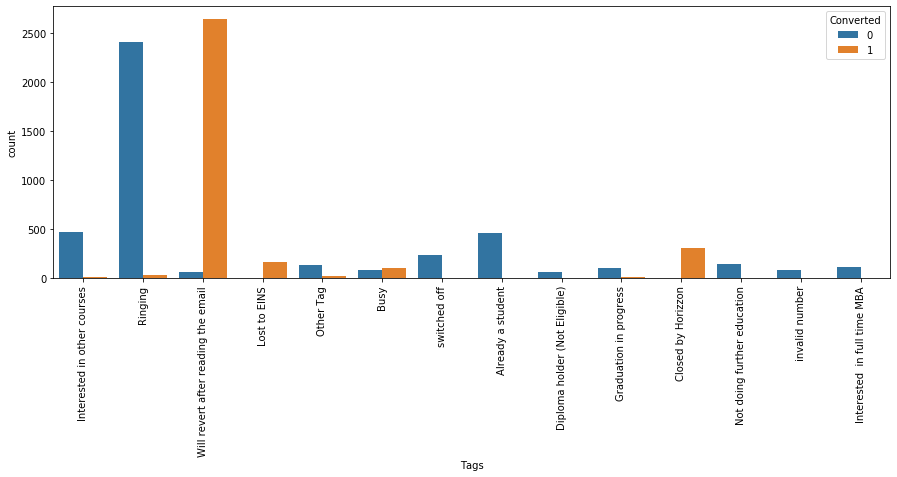

In [151]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = df)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

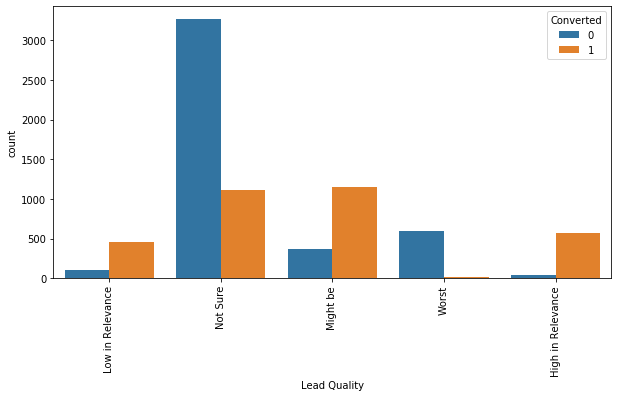

In [152]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = df)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

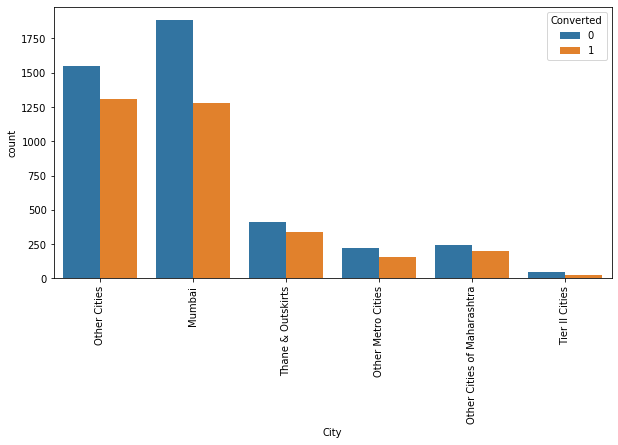

In [153]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = df)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

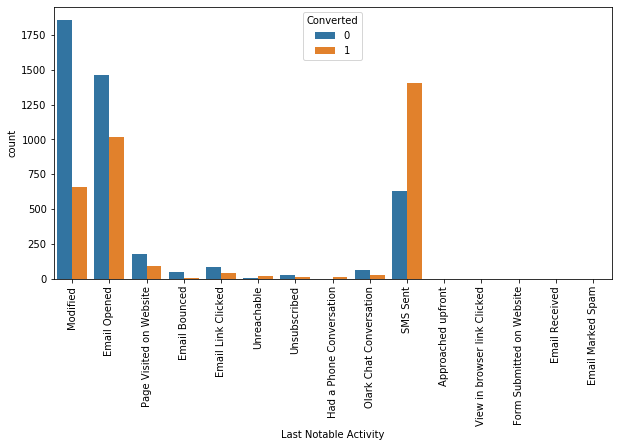

In [154]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
xticks(rotation = 90)

In [155]:
#df1=df
#df=df.drop(['Prospect ID'],axis=1)

In [156]:
df.shape

(7664, 37)

In [157]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [158]:
#DatMapping

#Store all columns whose dtype is object for data Mapping
col_obj=list(df.select_dtypes(include='object').columns)

In [159]:
#Store columns based on the unique values they hold

#1) Thos with higher number of categorical variables,Showed be fit to a LabelEncoder
#2) Those with Lesser should be handled with dummy variables
#3) Those with only 3,2,1 variables can be mapped manually

col_more=[]
col_less=[]
col_tri=[]
col_bin=[]
col_single=[]
for col in col_obj:
    if len(df[col].value_counts().index)>6:
        col_more.append(col)
    elif len((df[col].value_counts().index))<=6 and (len(df[col].value_counts().index))>3:
        col_less.append(col)
    elif len((df[col].value_counts().index))<=3 and (len(df[col].value_counts().index))>2:
        col_tri.append(col)
    elif len((df[col].value_counts().index))<=2 and (len(df[col].value_counts().index))>1:
        col_bin.append(col)
    else:
        col_single.append(col)  

In [160]:
#@Cheching how many categorical variables each object column holds with more categorical values
for col in col_obj:
    print(col)
    print(df[col].value_counts())
    print(len(df[col].value_counts().index))
    print('\n')

Prospect ID
4933a30a-bd22-4da4-af22-0c099fa87ec7    1
1ffbafaa-e8f5-49c9-8c0c-d3c6f0f9596f    1
9f15bd50-ec79-4f1d-9133-123ba85ef3bd    1
3b03e203-4783-437d-836c-a9f2c3a5564b    1
442e197d-2fd2-4d68-91ca-5514fe1e36cc    1
                                       ..
715d0d1a-a2df-40da-83f6-790f33c5c762    1
06b2272d-0a56-4bcf-b1a6-7ecda5bf1e15    1
66a30320-7076-4de7-ab08-9d8924b8256e    1
403eeb5e-8eb7-4364-9551-a4a9f1d09173    1
2ff9e754-db1b-43f0-abe0-c6d3b24b1a33    1
Name: Prospect ID, Length: 7664, dtype: int64
7664


Lead Origin
Landing Page Submission    4833
API                        2202
Lead Add Form               600
Lead Import                  29
Name: Lead Origin, dtype: int64
4


Lead Source
Google              2519
Direct Traffic      2467
Organic Search      1035
Olark Chat           918
Reference            462
Welingak Website     129
Referral Sites        84
Facebook              30
Others                20
Name: Lead Source, dtype: int64
9


Do Not Email
No     7046

In [161]:
col_more1=[i for i in col_more if i!='Prospect ID']

In [162]:
col_more1

['Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'Tags',
 'Last Notable Activity']

In [163]:
#@Using Label_Encoder for columns with more categorical values

for col in col_more:
    #print(col)
    df[col]=lb.fit_transform(df[col])

In [164]:
#@Cheching how many categorical variables each object column holds with more categorical values
for col in col_obj:
    print(col)
    print(df[col].value_counts())
    print(len(df[col].value_counts().index))
    print('\n')

Prospect ID
2047    1
1282    1
1258    1
3307    1
5360    1
       ..
4743    1
2700    1
653     1
6798    1
0       1
Name: Prospect ID, Length: 7664, dtype: int64
7664


Lead Origin
Landing Page Submission    4833
API                        2202
Lead Add Form               600
Lead Import                  29
Name: Lead Origin, dtype: int64
4


Lead Source
2    2519
0    2467
4    1035
3     918
6     462
8     129
7      84
1      30
5      20
Name: Lead Source, dtype: int64
9


Do Not Email
No     7046
Yes     618
Name: Do Not Email, dtype: int64
2


Do Not Call
No     7662
Yes       2
Name: Do Not Call, dtype: int64
2


Last Activity
3     2989
8     2524
7      566
5      463
0      350
1      266
2      205
4      114
9       89
10      51
6       47
Name: Last Activity, dtype: int64
11


Country
11    7402
34      58
32      51
25      24
24      21
33      14
0       12
22      10
10       7
1        7
7        6
20       6
19       4
15       4
4        4
8        4
26     

In [165]:
#Creating dummy variables col_less variables
df=pd.get_dummies(df,columns=col_less)

In [166]:
col_tri

['What matters most to you in choosing a course',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index']

In [167]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6392
Other                        1271
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

In [168]:
Course_bin={'Better Career Prospects':2,'Flexibility & Convenience':0,'Other':1}

In [169]:
df['Asymmetrique Activity Index'].value_counts()

02.Medium    6893
01.High       446
03.Low        325
Name: Asymmetrique Activity Index, dtype: int64

In [170]:
Index_bin={'02.Medium':2,'01.High':3,'03.Low':1}

In [171]:
#Mapping columns with 3 categorical variables manually
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].map(Course_bin)
df['Asymmetrique Activity Index']=df['Asymmetrique Activity Index'].map(Index_bin)
df['Asymmetrique Profile Index']=df['Asymmetrique Profile Index'].map(Index_bin)

In [172]:
#@Cheching how many categorical variables each object column holds with more categorical values
for col in col_single:
    print(col)
    print(df[col].value_counts())
    print(len(df[col].value_counts().index))
    print('\n')

Magazine
No    7664
Name: Magazine, dtype: int64
1


Receive More Updates About Our Courses
No    7664
Name: Receive More Updates About Our Courses, dtype: int64
1


Update me on Supply Chain Content
No    7664
Name: Update me on Supply Chain Content, dtype: int64
1


Get updates on DM Content
No    7664
Name: Get updates on DM Content, dtype: int64
1


I agree to pay the amount through cheque
No    7664
Name: I agree to pay the amount through cheque, dtype: int64
1




In [173]:
col_bin

['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [174]:
#Mapping binary values manually
Bin_map={'Yes':1,'No':0}
for col in col_bin:
    df[col]=df[col].map(Bin_map)

In [175]:
df[df['Newspaper']==1]

,Prospect ID,Lead Number,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3414,6480,627531,0,0,0,0,10.0,1812,3.33,3,11,4,4,2,0,No,0,0,1,0,0,No,10,No,No,2,2,14.0,16.0,No,0,4,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [176]:
#Mapping Single values manually
Sin_map={'No':0}
for col in col_single:
    df[col]=df[col].map(Sin_map)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7664 entries, 0 to 9239
Data columns (total 58 columns):
Prospect ID                                             7664 non-null int32
Lead Number                                             7664 non-null int64
Lead Source                                             7664 non-null int32
Do Not Email                                            7664 non-null int64
Do Not Call                                             7664 non-null int64
Converted                                               7664 non-null int64
TotalVisits                                             7664 non-null float64
Total Time Spent on Website                             7664 non-null int64
Page Views Per Visit                                    7664 non-null float64
Last Activity                                           7664 non-null int32
Country                                                 7664 non-null int32
Specialization                                       

In [178]:
df.head()

,Prospect ID,Lead Number,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,3652,660737,3,0,0,0,0.0,0,0.0,7,11,13,4,2,0,0,0,0,0,0,0,0,6,0,0,2,2,15.0,15.0,0,0,8,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1281,660728,4,0,0,0,5.0,674,2.5,3,11,13,4,2,0,0,0,0,0,0,0,0,10,0,0,2,2,15.0,15.0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,4268,660727,0,0,0,1,2.0,1532,2.0,3,11,1,4,2,0,0,0,0,0,0,0,0,11,0,0,2,3,14.0,20.0,0,1,4,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
3,380,660719,0,0,0,0,1.0,305,1.0,9,11,11,8,2,0,0,0,0,0,0,0,0,10,0,0,2,3,13.0,17.0,0,0,8,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4,1552,660681,2,0,0,1,2.0,1428,1.0,0,11,13,4,2,0,0,0,0,0,0,0,0,11,0,0,2,3,15.0,18.0,0,0,8,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0


In [179]:
# Normalising continuous features
scale_cols=df[['Lead Number','Lead Source','TotalVisits','Total Time Spent on Website','Page Views Per Visit','Last Activity','Country','Specialization','How did you hear about X Education','What matters most to you in choosing a course','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Last Notable Activity']]

In [180]:
scale_cols.head()

,Lead Number,Lead Source,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What matters most to you in choosing a course,Tags,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,660737,3,0.0,0,0.0,7,11,13,4,2,6,2,2,15.0,15.0,8
1,660728,4,5.0,674,2.5,3,11,13,4,2,10,2,2,15.0,15.0,4
2,660727,0,2.0,1532,2.0,3,11,1,4,2,11,2,3,14.0,20.0,4
3,660719,0,1.0,305,1.0,9,11,11,8,2,10,2,3,13.0,17.0,8
4,660681,2,2.0,1428,1.0,0,11,13,4,2,11,2,3,15.0,18.0,8


In [181]:
normalized_df=(scale_cols-scale_cols.mean())/scale_cols.std()
df = df.drop(['Lead Number','Lead Source','TotalVisits','Total Time Spent on Website','Page Views Per Visit','Last Activity','Country','Specialization','How did you hear about X Education','What matters most to you in choosing a course','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Last Notable Activity'], 1)
df = pd.concat([df,normalized_df],axis=1)
df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Number,Lead Source,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What matters most to you in choosing a course,Tags,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,3652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1.883844,0.437717,-1.278318,-0.963336,-1.432820,0.756730,-0.144456,0.819613,-0.108126,0.445854,-0.777918,-0.049836,-0.605605,0.981960,-0.954518,0.181014
1,1281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1.883458,0.950819,0.542353,0.251526,-0.003945,-0.741192,-0.144456,0.819613,-0.108126,0.445854,0.363838,-0.049836,-0.605605,0.981960,-0.954518,-1.181748
2,4268,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1.883415,-1.101590,-0.550050,1.798041,-0.289720,-0.741192,-0.144456,-1.710704,-0.108126,0.445854,0.649277,-0.049836,1.586817,-0.079948,2.645593,-1.181748
3,380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1.883072,-1.101590,-0.914184,-0.413584,-0.861270,1.505692,-0.144456,0.397893,3.193384,0.445854,0.363838,-0.049836,1.586817,-1.141856,0.485527,0.181014
4,1552,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1.881442,-0.075385,-0.550050,1.610585,-0.861270,-1.864634,-0.144456,0.819613,-0.108126,0.445854,0.649277,-0.049836,1.586817,0.981960,1.205549,0.181014


In [182]:
#Reset the index of df
df.set_index("Prospect ID", inplace=True)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7664 entries, 3652 to 2650
Data columns (total 57 columns):
Do Not Email                                            7664 non-null int64
Do Not Call                                             7664 non-null int64
Converted                                               7664 non-null int64
Search                                                  7664 non-null int64
Magazine                                                7664 non-null int64
Newspaper Article                                       7664 non-null int64
X Education Forums                                      7664 non-null int64
Newspaper                                               7664 non-null int64
Digital Advertisement                                   7664 non-null int64
Through Recommendations                                 7664 non-null int64
Receive More Updates About Our Courses                  7664 non-null int64
Update me on Supply Chain Content                     

In [184]:
df.head()

,Do Not Email,Do Not Call,Converted,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Number,Lead Source,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What matters most to you in choosing a course,Tags,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
Prospect ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1.883844,0.437717,-1.278318,-0.963336,-1.432820,0.756730,-0.144456,0.819613,-0.108126,0.445854,-0.777918,-0.049836,-0.605605,0.981960,-0.954518,0.181014
1281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1.883458,0.950819,0.542353,0.251526,-0.003945,-0.741192,-0.144456,0.819613,-0.108126,0.445854,0.363838,-0.049836,-0.605605,0.981960,-0.954518,-1.181748
4268,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1.883415,-1.101590,-0.550050,1.798041,-0.289720,-0.741192,-0.144456,-1.710704,-0.108126,0.445854,0.649277,-0.049836,1.586817,-0.079948,2.645593,-1.181748
380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1.883072,-1.101590,-0.914184,-0.413584,-0.861270,1.505692,-0.144456,0.397893,3.193384,0.445854,0.363838,-0.049836,1.586817,-1.141856,0.485527,0.181014
1552,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1.881442,-0.075385,-0.550050,1.610585,-0.861270,-1.864634,-0.144456,0.819613,-0.108126,0.445854,0.649277,-0.049836,1.586817,0.981960,1.205549,0.181014


In [187]:
#Analyszing which sub-sectors corelate with GDP
corr=df.corr()
corr['Converted'].sort_values(ascending=False)[1:15]

Lead Profile_Potential Lead                             0.358370
Lead Quality_Might be                                   0.326519
Total Time Spent on Website                             0.324602
What is your current occupation_Working Professional    0.309297
Lead Quality_High in Relevance                          0.303672
Lead Origin_Lead Add Form                               0.295821
Asymmetrique Activity Score                             0.234074
What matters most to you in choosing a course           0.231515
Lead Source                                             0.230539
Last Activity                                           0.230473
Lead Quality_Low in Relevance                           0.219335
Tags                                                    0.210511
Last Notable Activity                                   0.167785
Asymmetrique Activity Index                             0.119684
Name: Converted, dtype: float64

In [77]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['Converted'],axis=1)

# Putting response variable to y
y = df['Converted']

y.head()

Prospect ID
3652    0
1281    0
4268    1
380     0
1552    1
Name: Converted, dtype: int64

In [78]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [79]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True False False False False False  True  True False False False False
 False False False  True  True False False  True  True False False  True
  True  True  True  True  True  True  True  True False  True False False
 False False False False False False False  True False  True False False
 False False False False False  True False False]
[ 1 18 14 34 29 12  1  1 13 33 37 35 36 26  7  1  1  6 21  1  1 16  4  1
  1  1  1  1  1  1  1  1 30  1 25 24  8 23 15 19 17 22 20  1  5  1 31 32
 28 11  2  3  9  1 10 27]


In [80]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 18),
 ('Search', False, 14),
 ('Magazine', False, 34),
 ('Newspaper Article', False, 29),
 ('X Education Forums', False, 12),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 13),
 ('Receive More Updates About Our Courses', False, 33),
 ('Update me on Supply Chain Content', False, 37),
 ('Get updates on DM Content', False, 35),
 ('I agree to pay the amount through cheque', False, 36),
 ('A free copy of Mastering The Interview', False, 26),
 ('Lead Origin_API', False, 7),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('What is your current occupation_Businessman', False, 21),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other_Occupation', True, 1),
 ('What is your current occupation_Student', False, 16),
 ('What is your current occupation_Unemployed', Fals

In [81]:
#Selecting all the cols with rfe support
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Newspaper', 'Digital Advertisement',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other_Occupation',
       'What is your current occupation_Working Professional',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Other Leads',
       'Lead Profile_Student of SomeSchool', 'Total Time Spent on Website',
       'Last Activity', 'Asymmetrique Activity Score'],
      dtype='object')

In [82]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Lead Import',
       'What is your current occupation_Businessman',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Lead Profile_Potential Lead', 'City_Mumbai', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities', 'Lead Number',
       'Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What matters most to you in choosing a course', 'Tags',
       'Asymmetrique Activity Ind

In [83]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [84]:
import statsmodels.api as sm

In [85]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5364
Model:                            GLM   Df Residuals:                     5345
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Aug 2019   Deviance:                          nan
Time:                        12:31:29   Pearson chi2:                 6.49e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 4.337e+25   3.54e+19   1.22e+06      0.000    4.34e+25    4.34e+25
Do Not Email                                         -7.095e+14   3.46e+06  -2.05e+08      0.000    -7.1e+14    -7.1e+14
Newspaper                                            -8.957e+21   7.32e+15  -1.22e+06      0.000   -8.96e+21   -8.96e+21
Digital Advertisement                                 -1.02e+15   4.88e+07  -2.09e+07      0.000   -1.02e+15   -1.02e+15
Lead Origin_Landing Page Submission                  -5.853e+14    2.2e+06  -2.66e+08      0.000   -5.85e+14   -5.85e+14
Lead Origin_Lead Add Form                             1.892e+15   4.01e+06   4.72e+08      0.000    1.89e+15    1.89e+15
What is your current occupation_Housewife             4.604e+15   2.55e+07    1.8e+08      0.000     4.6e+15     4.6e+15
What is your current occupation_Other_Occupation      -2.36e+14   2.82e+06  -8.38e+07      0.000   -2.36e+14   -2.36e+14
What is your current occupation_Working Professional  1.006e+15   3.62e+06   2.78e+08      0.000    1.01e+15    1.01e+15
Lead Quality_High in Relevance                       -4.337e+25   3.54e+19  -1.22e+06      0.000   -4.34e+25   -4.34e+25
Lead Quality_Low in Relevance                        -4.337e+25   3.54e+19  -1.22e+06      0.000   -4.34e+25   -4.34e+25
Lead Quality_Might be                                -4.337e+25   3.54e+19  -1.22e+06      0.000   -4.34e+25   -4.34e+25
Lead Quality_Not Sure                                -4.337e+25   3.54e+19  -1.22e+06      0.000   -4.34e+25   -4.34e+25
Lead Quality_Worst                                   -4.337e+25   3.54e+19  -1.22e+06      0.000   -4.34e+25   -4.34e+25
Lead Profile_Dual Specialization Student              2.459e+15   1.88e+07   1.31e+08      0.000    2.46e+15    2.46e+15
Lead Profile_Lateral Student                          1.196e+15   1.81e+07   6.59e+07      0.000     1.2e+15     1.2e+15
Lead Profile_Other Leads                             -3.233e+14   2.83e+06  -1.14e+08      0.000   -3.23e+14   -3.23e+14
Lead Profile_Student of SomeSchool                   -5.454e+14   6.84e+06  -7.97e+07      0.000   -5.45e+14   -5.45e+14
Total Time Spent on Website                           7.487e+14   9.96e+05   7.52e+08      0.000    7.49e+14    7.49e+14
Last Activity                                         3.659e+14   9.72e+05   3.76e+08      0.000    3.66e+14    3.66e+14
Asymmetrique Activity Score                           5.035e+14   9.38e+05   5.37e+08      0.000    5.04e+14    5.04e+14
========================================================================================================================
"""

In [86]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead Quality_Not Sure,7.08
10,Lead Quality_Might be,2.99
12,Lead Quality_Worst,2.50
16,Lead Profile_Student of SomeSchool,1.84
15,Lead Profile_Other Leads,1.75
8,Lead Quality_High in Relevance,1.41
9,Lead Quality_Low in Relevance,1.41
4,Lead Origin_Lead Add Form,1.37
3,Lead Origin_Landing Page Submission,1.34
6,What is your current occupation_Other_Occupation,1.29


In [88]:
#Drop Lead Quality_Not_Sure
col = col.drop('Lead Quality_Not Sure', 1)
col

Index(['Do Not Email', 'Newspaper', 'Digital Advertisement',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other_Occupation',
       'What is your current occupation_Working Professional',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Worst',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Other Leads',
       'Lead Profile_Student of SomeSchool', 'Total Time Spent on Website',
       'Last Activity', 'Asymmetrique Activity Score'],
      dtype='object')

In [89]:
X_train_rfe = X_train[col]
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5364
Model:                            GLM   Df Residuals:                     5345
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1909.2
Date:                Mon, 26 Aug 2019   Deviance:                       3818.3
Time:                        12:31:33   Pearson chi2:                 6.83e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2987      0.141     -2.116      0.034      -0.576      -0.022
Do Not Email                                            -1.1924      0.197     -6.058      0.000      -1.578      -0.807
Newspaper                                             2.811e-11   8.18e-08      0.000      1.000    -1.6e-07     1.6e-07
Digital Advertisement                                   -0.7166      1.985     -0.361      0.718      -4.607       3.173
Lead Origin_Landing Page Submission                     -0.6989      0.095     -7.335      0.000      -0.886      -0.512
Lead Origin_Lead Add Form                                2.8285      0.233     12.131      0.000       2.372       3.286
What is your current occupation_Housewife               22.8153   2.58e+04      0.001      0.999   -5.06e+04    5.07e+04
What is your current occupation_Other_Occupation        -0.4220      0.125     -3.377      0.001      -0.667      -0.177
What is your current occupation_Working Professional     1.7349      0.222      7.801      0.000       1.299       2.171
Lead Quality_High in Relevance                           3.4353      0.266     12.893      0.000       2.913       3.958
Lead Quality_Low in Relevance                            1.9810      0.176     11.251      0.000       1.636       2.326
Lead Quality_Might be                                    1.4623      0.108     13.507      0.000       1.250       1.674
Lead Quality_Worst                                      -2.7724      0.409     -6.777      0.000      -3.574      -1.971
Lead Profile_Dual Specialization Student                21.8417   1.85e+04      0.001      0.999   -3.62e+04    3.62e+04
Lead Profile_Lateral Student                            20.0188   1.84e+04      0.001      0.999    -3.6e+04     3.6e+04
Lead Profile_Other Leads                                -0.4203      0.128     -3.286      0.001      -0.671      -0.170
Lead Profile_Student of SomeSchool                      -0.8753      0.568     -1.540      0.124      -1.989       0.239
Total Time Spent on Website                              0.9434      0.044     21.464      0.000       0.857       1.030
Last Activity                                            0.5318      0.044     12.033      0.000       0.445       0.618
Asymmetrique Activity Score                              0.7329      0.049     14.840      0.000       0.636       0.830
========================================================================================================================
"""

In [90]:
#Drop Newspaper due to high P-value
col = col.drop('Newspaper', 1)
col

Index(['Do Not Email', 'Digital Advertisement',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other_Occupation',
       'What is your current occupation_Working Professional',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Worst',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Other Leads',
       'Lead Profile_Student of SomeSchool', 'Total Time Spent on Website',
       'Last Activity', 'Asymmetrique Activity Score'],
      dtype='object')

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.09
13,Lead Profile_Other Leads,2.59
10,Lead Quality_Worst,1.83
14,Lead Profile_Student of SomeSchool,1.72
9,Lead Quality_Might be,1.69
5,What is your current occupation_Other_Occupation,1.53
3,Lead Origin_Lead Add Form,1.42
6,What is your current occupation_Working Profes...,1.36
7,Lead Quality_High in Relevance,1.27
8,Lead Quality_Low in Relevance,1.19


In [92]:
X_train_rfe = X_train[col]
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5364
Model:                            GLM   Df Residuals:                     5345
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1909.2
Date:                Mon, 26 Aug 2019   Deviance:                       3818.3
Time:                        12:31:34   Pearson chi2:                 6.83e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2987      0.141     -2.116      0.034      -0.576      -0.022
Do Not Email                                            -1.1924      0.197     -6.058      0.000      -1.578      -0.807
Digital Advertisement                                   -0.7166      1.985     -0.361      0.718      -4.607       3.173
Lead Origin_Landing Page Submission                     -0.6989      0.095     -7.335      0.000      -0.886      -0.512
Lead Origin_Lead Add Form                                2.8285      0.233     12.131      0.000       2.372       3.286
What is your current occupation_Housewife               22.8153   2.58e+04      0.001      0.999   -5.06e+04    5.07e+04
What is your current occupation_Other_Occupation        -0.4220      0.125     -3.377      0.001      -0.667      -0.177
What is your current occupation_Working Professional     1.7349      0.222      7.801      0.000       1.299       2.171
Lead Quality_High in Relevance                           3.4353      0.266     12.893      0.000       2.913       3.958
Lead Quality_Low in Relevance                            1.9810      0.176     11.251      0.000       1.636       2.326
Lead Quality_Might be                                    1.4623      0.108     13.507      0.000       1.250       1.674
Lead Quality_Worst                                      -2.7724      0.409     -6.777      0.000      -3.574      -1.971
Lead Profile_Dual Specialization Student                21.8417   1.85e+04      0.001      0.999   -3.62e+04    3.62e+04
Lead Profile_Lateral Student                            20.0188   1.84e+04      0.001      0.999    -3.6e+04     3.6e+04
Lead Profile_Other Leads                                -0.4203      0.128     -3.286      0.001      -0.671      -0.170
Lead Profile_Student of SomeSchool                      -0.8753      0.568     -1.540      0.124      -1.989       0.239
Total Time Spent on Website                              0.9434      0.044     21.464      0.000       0.857       1.030
Last Activity                                            0.5318      0.044     12.033      0.000       0.445       0.618
Asymmetrique Activity Score                              0.7329      0.049     14.840      0.000       0.636       0.830
========================================================================================================================
"""

In [93]:
#Drop What is your current occupation_Housewife due to high P-value
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Do Not Email', 'Digital Advertisement',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Other_Occupation',
       'What is your current occupation_Working Professional',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Worst',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Other Leads',
       'Lead Profile_Student of SomeSchool', 'Total Time Spent on Website',
       'Last Activity', 'Asymmetrique Activity Score'],
      dtype='object')

In [94]:
X_train_rfe = X_train[col]
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5364
Model:                            GLM   Df Residuals:                     5346
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1912.0
Date:                Mon, 26 Aug 2019   Deviance:                       3824.0
Time:                        12:31:35   Pearson chi2:                 6.83e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3121      0.141     -2.212      0.027      -0.589      -0.036
Do Not Email                                            -1.1957      0.197     -6.074      0.000      -1.581      -0.810
Digital Advertisement                                   -0.7141      1.983     -0.360      0.719      -4.601       3.173
Lead Origin_Landing Page Submission                     -0.6936      0.095     -7.285      0.000      -0.880      -0.507
Lead Origin_Lead Add Form                                2.8340      0.233     12.162      0.000       2.377       3.291
What is your current occupation_Other_Occupation        -0.4253      0.125     -3.405      0.001      -0.670      -0.181
What is your current occupation_Working Professional     1.7265      0.222      7.762      0.000       1.291       2.163
Lead Quality_High in Relevance                           3.4405      0.266     12.915      0.000       2.918       3.963
Lead Quality_Low in Relevance                            2.0181      0.176     11.498      0.000       1.674       2.362
Lead Quality_Might be                                    1.4675      0.108     13.570      0.000       1.256       1.679
Lead Quality_Worst                                      -2.7686      0.409     -6.772      0.000      -3.570      -1.967
Lead Profile_Dual Specialization Student                21.8420   1.85e+04      0.001      0.999   -3.62e+04    3.62e+04
Lead Profile_Lateral Student                            20.0050   1.84e+04      0.001      0.999   -3.61e+04    3.61e+04
Lead Profile_Other Leads                                -0.4079      0.128     -3.192      0.001      -0.658      -0.157
Lead Profile_Student of SomeSchool                      -0.8702      0.569     -1.530      0.126      -1.985       0.245
Total Time Spent on Website                              0.9425      0.044     21.464      0.000       0.856       1.029
Last Activity                                            0.5303      0.044     12.005      0.000       0.444       0.617
Asymmetrique Activity Score                              0.7315      0.049     14.827      0.000       0.635       0.828
========================================================================================================================
"""

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.09
12,Lead Profile_Other Leads,2.59
9,Lead Quality_Worst,1.83
13,Lead Profile_Student of SomeSchool,1.72
8,Lead Quality_Might be,1.69
4,What is your current occupation_Other_Occupation,1.53
3,Lead Origin_Lead Add Form,1.42
5,What is your current occupation_Working Profes...,1.36
6,Lead Quality_High in Relevance,1.27
7,Lead Quality_Low in Relevance,1.18


In [96]:
#Drop Lead Profile_Dual Specialization Student due to high P-value
col = col.drop('Lead Profile_Dual Specialization Student', 1)
col

Index(['Do Not Email', 'Digital Advertisement',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Other_Occupation',
       'What is your current occupation_Working Professional',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Worst',
       'Lead Profile_Lateral Student', 'Lead Profile_Other Leads',
       'Lead Profile_Student of SomeSchool', 'Total Time Spent on Website',
       'Last Activity', 'Asymmetrique Activity Score'],
      dtype='object')

In [97]:
X_train_rfe = X_train[col]
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5364
Model:                            GLM   Df Residuals:                     5347
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1914.2
Date:                Mon, 26 Aug 2019   Deviance:                       3828.4
Time:                        12:31:39   Pearson chi2:                 6.86e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2962      0.141     -2.103      0.035      -0.572      -0.020
Do Not Email                                            -1.1728      0.195     -6.002      0.000      -1.556      -0.790
Digital Advertisement                                   -0.7242      1.992     -0.364      0.716      -4.628       3.179
Lead Origin_Landing Page Submission                     -0.6933      0.095     -7.284      0.000      -0.880      -0.507
Lead Origin_Lead Add Form                                2.8298      0.233     12.146      0.000       2.373       3.286
What is your current occupation_Other_Occupation        -0.4244      0.125     -3.398      0.001      -0.669      -0.180
What is your current occupation_Working Professional     1.7288      0.222      7.780      0.000       1.293       2.164
Lead Quality_High in Relevance                           3.4372      0.266     12.919      0.000       2.916       3.959
Lead Quality_Low in Relevance                            2.0210      0.175     11.531      0.000       1.677       2.365
Lead Quality_Might be                                    1.4731      0.108     13.629      0.000       1.261       1.685
Lead Quality_Worst                                      -2.7706      0.409     -6.778      0.000      -3.572      -1.969
Lead Profile_Lateral Student                            19.9878   1.84e+04      0.001      0.999   -3.61e+04    3.61e+04
Lead Profile_Other Leads                                -0.4264      0.127     -3.345      0.001      -0.676      -0.177
Lead Profile_Student of SomeSchool                      -0.8862      0.569     -1.558      0.119      -2.001       0.228
Total Time Spent on Website                              0.9422      0.044     21.460      0.000       0.856       1.028
Last Activity                                            0.5299      0.044     12.001      0.000       0.443       0.616
Asymmetrique Activity Score                              0.7319      0.049     14.836      0.000       0.635       0.829
========================================================================================================================
"""

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.09
11,Lead Profile_Other Leads,2.58
9,Lead Quality_Worst,1.83
12,Lead Profile_Student of SomeSchool,1.72
8,Lead Quality_Might be,1.69
4,What is your current occupation_Other_Occupation,1.53
3,Lead Origin_Lead Add Form,1.41
5,What is your current occupation_Working Profes...,1.35
6,Lead Quality_High in Relevance,1.27
7,Lead Quality_Low in Relevance,1.18


In [99]:
#Drop Lead Profile_Lateral Student 	due to high P-value
col = col.drop('Lead Profile_Lateral Student', 1)
col

Index(['Do Not Email', 'Digital Advertisement',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Other_Occupation',
       'What is your current occupation_Working Professional',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Worst',
       'Lead Profile_Other Leads', 'Lead Profile_Student of SomeSchool',
       'Total Time Spent on Website', 'Last Activity',
       'Asymmetrique Activity Score'],
      dtype='object')

In [100]:
X_train_rfe = X_train[col]
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5364
Model:                            GLM   Df Residuals:                     5348
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1914.7
Date:                Mon, 26 Aug 2019   Deviance:                       3829.4
Time:                        12:31:41   Pearson chi2:                 6.88e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2933      0.141     -2.082      0.037      -0.569      -0.017
Do Not Email                                            -1.1736      0.195     -6.004      0.000      -1.557      -0.791
Digital Advertisement                                   -0.7265      1.993     -0.364      0.716      -4.633       3.180
Lead Origin_Landing Page Submission                     -0.6934      0.095     -7.284      0.000      -0.880      -0.507
Lead Origin_Lead Add Form                                2.8335      0.233     12.167      0.000       2.377       3.290
What is your current occupation_Other_Occupation        -0.4241      0.125     -3.396      0.001      -0.669      -0.179
What is your current occupation_Working Professional     1.7303      0.222      7.789      0.000       1.295       2.166
Lead Quality_High in Relevance                           3.4426      0.266     12.947      0.000       2.921       3.964
Lead Quality_Low in Relevance                            2.0267      0.175     11.572      0.000       1.683       2.370
Lead Quality_Might be                                    1.4732      0.108     13.628      0.000       1.261       1.685
Lead Quality_Worst                                      -2.7710      0.409     -6.779      0.000      -3.572      -1.970
Lead Profile_Other Leads                                -0.4298      0.127     -3.373      0.001      -0.680      -0.180
Lead Profile_Student of SomeSchool                      -0.8904      0.569     -1.565      0.118      -2.005       0.225
Total Time Spent on Website                              0.9429      0.044     21.474      0.000       0.857       1.029
Last Activity                                            0.5297      0.044     11.994      0.000       0.443       0.616
Asymmetrique Activity Score                              0.7324      0.049     14.846      0.000       0.636       0.829
========================================================================================================================
"""

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.09
10,Lead Profile_Other Leads,2.58
9,Lead Quality_Worst,1.83
11,Lead Profile_Student of SomeSchool,1.72
8,Lead Quality_Might be,1.69
4,What is your current occupation_Other_Occupation,1.53
3,Lead Origin_Lead Add Form,1.41
5,What is your current occupation_Working Profes...,1.35
6,Lead Quality_High in Relevance,1.26
7,Lead Quality_Low in Relevance,1.18


In [102]:
#Drop Digital Advertisement 	due to high P-value
col = col.drop('Digital Advertisement', 1)
col

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Other_Occupation',
       'What is your current occupation_Working Professional',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Worst',
       'Lead Profile_Other Leads', 'Lead Profile_Student of SomeSchool',
       'Total Time Spent on Website', 'Last Activity',
       'Asymmetrique Activity Score'],
      dtype='object')

In [103]:
X_train_rfe = X_train[col]
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5364
Model:                            GLM   Df Residuals:                     5349
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1914.8
Date:                Mon, 26 Aug 2019   Deviance:                       3829.6
Time:                        12:31:47   Pearson chi2:                 6.88e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2940      0.141     -2.088      0.037      -0.570      -0.018
Do Not Email                                            -1.1732      0.195     -6.002      0.000      -1.556      -0.790
Lead Origin_Landing Page Submission                     -0.6935      0.095     -7.286      0.000      -0.880      -0.507
Lead Origin_Lead Add Form                                2.8332      0.233     12.166      0.000       2.377       3.290
What is your current occupation_Other_Occupation        -0.4254      0.125     -3.407      0.001      -0.670      -0.181
What is your current occupation_Working Professional     1.7307      0.222      7.791      0.000       1.295       2.166
Lead Quality_High in Relevance                           3.4431      0.266     12.949      0.000       2.922       3.964
Lead Quality_Low in Relevance                            2.0271      0.175     11.575      0.000       1.684       2.370
Lead Quality_Might be                                    1.4728      0.108     13.625      0.000       1.261       1.685
Lead Quality_Worst                                      -2.7707      0.409     -6.778      0.000      -3.572      -1.970
Lead Profile_Other Leads                                -0.4289      0.127     -3.366      0.001      -0.679      -0.179
Lead Profile_Student of SomeSchool                      -0.8897      0.569     -1.564      0.118      -2.005       0.225
Total Time Spent on Website                              0.9426      0.044     21.471      0.000       0.857       1.029
Last Activity                                            0.5298      0.044     11.994      0.000       0.443       0.616
Asymmetrique Activity Score                              0.7323      0.049     14.843      0.000       0.636       0.829
========================================================================================================================
"""

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,3.09
9,Lead Profile_Other Leads,2.58
8,Lead Quality_Worst,1.83
10,Lead Profile_Student of SomeSchool,1.72
7,Lead Quality_Might be,1.69
3,What is your current occupation_Other_Occupation,1.53
2,Lead Origin_Lead Add Form,1.41
4,What is your current occupation_Working Profes...,1.35
5,Lead Quality_High in Relevance,1.26
6,Lead Quality_Low in Relevance,1.18


In [105]:
#Drop Lead Profile_Student of SomeSchool due to high P-value
col = col.drop('Lead Profile_Student of SomeSchool', 1)
col

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Other_Occupation',
       'What is your current occupation_Working Professional',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Worst',
       'Lead Profile_Other Leads', 'Total Time Spent on Website',
       'Last Activity', 'Asymmetrique Activity Score'],
      dtype='object')

In [106]:
X_train_rfe = X_train[col]
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5364
Model:                            GLM   Df Residuals:                     5350
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1916.1
Date:                Mon, 26 Aug 2019   Deviance:                       3832.1
Time:                        12:31:50   Pearson chi2:                 6.95e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3313      0.139     -2.385      0.017      -0.604      -0.059
Do Not Email                                            -1.1729      0.195     -6.000      0.000      -1.556      -0.790
Lead Origin_Landing Page Submission                     -0.6913      0.095     -7.268      0.000      -0.878      -0.505
Lead Origin_Lead Add Form                                2.8408      0.233     12.185      0.000       2.384       3.298
What is your current occupation_Other_Occupation        -0.4260      0.125     -3.412      0.001      -0.671      -0.181
What is your current occupation_Working Professional     1.7297      0.222      7.801      0.000       1.295       2.164
Lead Quality_High in Relevance                           3.4632      0.266     13.034      0.000       2.942       3.984
Lead Quality_Low in Relevance                            2.0374      0.175     11.650      0.000       1.695       2.380
Lead Quality_Might be                                    1.4784      0.108     13.684      0.000       1.267       1.690
Lead Quality_Worst                                      -3.1497      0.362     -8.703      0.000      -3.859      -2.440
Lead Profile_Other Leads                                -0.3924      0.125     -3.128      0.002      -0.638      -0.147
Total Time Spent on Website                              0.9422      0.044     21.474      0.000       0.856       1.028
Last Activity                                            0.5314      0.044     12.034      0.000       0.445       0.618
Asymmetrique Activity Score                              0.7307      0.049     14.838      0.000       0.634       0.827
========================================================================================================================
"""

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,3.05
9,Lead Profile_Other Leads,2.47
7,Lead Quality_Might be,1.68
3,What is your current occupation_Other_Occupation,1.53
2,Lead Origin_Lead Add Form,1.41
4,What is your current occupation_Working Profes...,1.35
5,Lead Quality_High in Relevance,1.26
6,Lead Quality_Low in Relevance,1.18
10,Total Time Spent on Website,1.17
8,Lead Quality_Worst,1.16


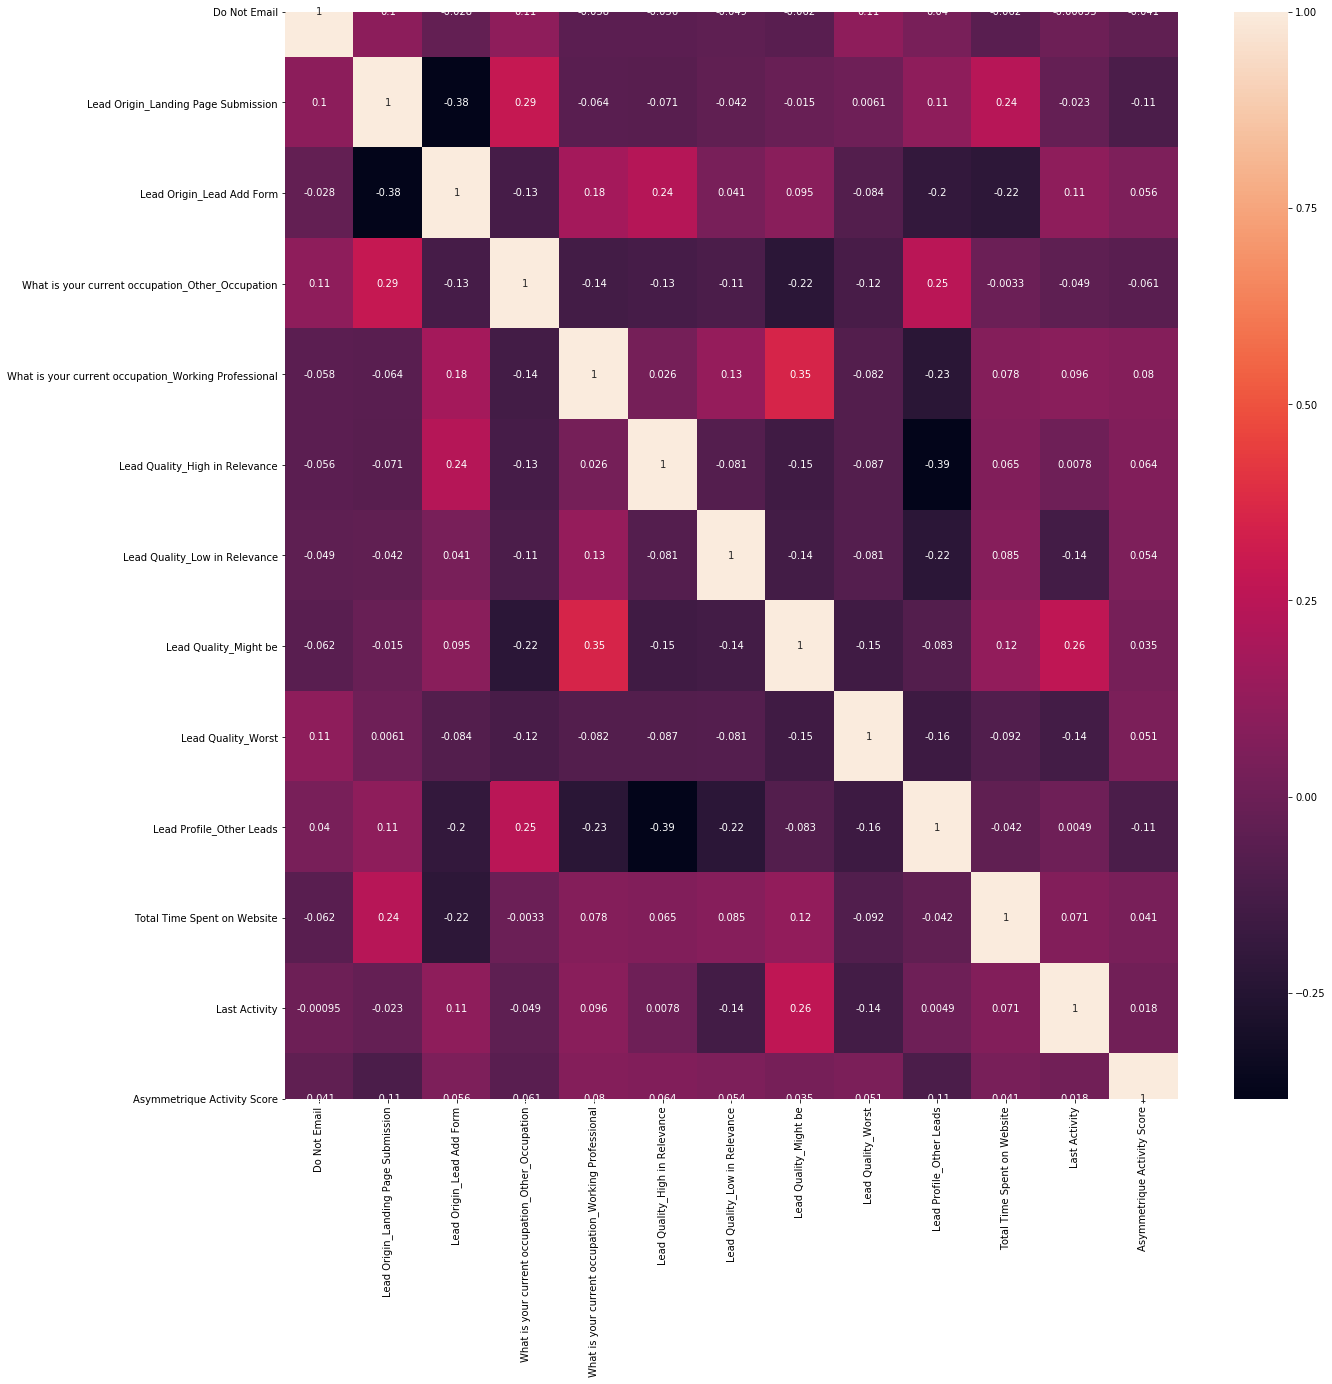

In [108]:
plt.figure(figsize = (20,20))
sns.heatmap(X_train_rfe.corr(),annot = True)

In [722]:
col

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Other_Occupation',
       'What is your current occupation_Working Professional',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Worst',
       'Lead Profile_Other Leads', 'Total Time Spent on Website',
       'Last Activity', 'Asymmetrique Activity Score'],
      dtype='object')

In [723]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [724]:
#Comparing the model with StatsModels
#logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5364
Model:                            GLM   Df Residuals:                     5350
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1916.1
Date:                Sun, 25 Aug 2019   Deviance:                       3832.1
Time:                        00:33:04   Pearson chi2:                 6.95e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3313      0.139     -2.385      0.017      -0.604      -0.059
Do Not Email                                            -1.1729      0.195     -6.000      0.000      -1.556      -0.790
Lead Origin_Landing Page Submission                     -0.6913      0.095     -7.268      0.000      -0.878      -0.505
Lead Origin_Lead Add Form                                2.8408      0.233     12.185      0.000       2.384       3.298
What is your current occupation_Other_Occupation        -0.4260      0.125     -3.412      0.001      -0.671      -0.181
What is your current occupation_Working Professional     1.7297      0.222      7.801      0.000       1.295       2.164
Lead Quality_High in Relevance                           3.4632      0.266     13.034      0.000       2.942       3.984
Lead Quality_Low in Relevance                            2.0374      0.175     11.650      0.000       1.695       2.380
Lead Quality_Might be                                    1.4784      0.108     13.684      0.000       1.267       1.690
Lead Quality_Worst                                      -3.1497      0.362     -8.703      0.000      -3.859      -2.440
Lead Profile_Other Leads                                -0.3924      0.125     -3.128      0.002      -0.638      -0.147
Total Time Spent on Website                              0.9422      0.044     21.474      0.000       0.856       1.028
Last Activity                                            0.5314      0.044     12.034      0.000       0.445       0.618
Asymmetrique Activity Score                              0.7307      0.049     14.838      0.000       0.634       0.827
========================================================================================================================
"""

In [725]:
# Predicted probabilities on train data
y_pred = logsk.predict_proba(X_train[col])
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.326952
1,0.312868
2,0.004218
3,0.870418
4,0.816734


In [726]:
# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train)
y_test_df.head()

,Converted,Prospect ID
0,0,206
1,0,6441
2,0,4955
3,0,473
4,1,5602


In [727]:
# Putting Prospect ID to index
y_train_df['Prospect ID'] = y_train_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_train_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Churn_Prob
0,0,7400,0.326952
1,1,5343,0.312868
2,0,2445,0.004218
3,0,5956,0.870418
4,1,2582,0.816734


In [728]:
y_pred_final.reindex(columns=['Prospect ID','Converted','Churn_Prob'])

,Prospect ID,Converted,Churn_Prob
0,7400,0,0.326952
1,5343,1,0.312868
2,2445,0,0.004218
3,5956,0,0.870418
4,2582,1,0.816734
5,3761,0,0.091231
6,1745,0,0.195964
7,745,0,0.149416
8,1536,1,0.840996
9,3574,0,0.069051


In [729]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,Converted,Prospect ID,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,7400,0.326952,1,1,1,1,0,0,0,0,0,0
1,1,5343,0.312868,1,1,1,1,0,0,0,0,0,0
2,0,2445,0.004218,1,0,0,0,0,0,0,0,0,0
3,0,5956,0.870418,1,1,1,1,1,1,1,1,1,0
4,1,2582,0.816734,1,1,1,1,1,1,1,1,1,0


In [730]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.432699  1.000000  0.000000
0.1   0.1  0.692580  0.982335  0.471574
0.2   0.2  0.790082  0.938819  0.676635
0.3   0.3  0.824385  0.882809  0.779823
0.4   0.4  0.840604  0.842740  0.838975
0.5   0.5  0.840231  0.789315  0.879067
0.6   0.6  0.837435  0.732443  0.917516
0.7   0.7  0.819911  0.656183  0.944791
0.8   0.8  0.793811  0.567859  0.966152
0.9   0.9  0.744407  0.424386  0.988498


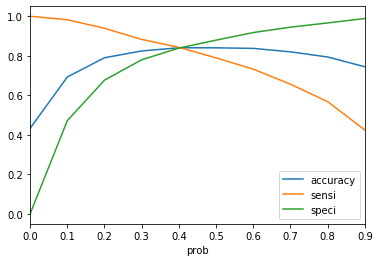

In [731]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [732]:
#From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [733]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_pred_final.head()

,Converted,Prospect ID,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,7400,0.326952,1,1,1,1,0,0,0,0,0,0,0
1,1,5343,0.312868,1,1,1,1,0,0,0,0,0,0,0
2,0,2445,0.004218,1,0,0,0,0,0,0,0,0,0,0
3,0,5956,0.870418,1,1,1,1,1,1,1,1,1,0,1
4,1,2582,0.816734,1,1,1,1,1,1,1,1,1,0,1


In [734]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8406040268456376

In [735]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[2553,  490],
       [ 365, 1956]], dtype=int64)

In [736]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [737]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8427401981904351

In [738]:
# Let us calculate specificity
TN / float(TN+FP)

0.8389746960236608

In [739]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16102530397633913


In [740]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7996729354047425


In [741]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8749143248800548


In [742]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7980676328502415

In [743]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8428571428571429

In [744]:
from sklearn.metrics import precision_recall_curve

In [745]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Churn_Prob)

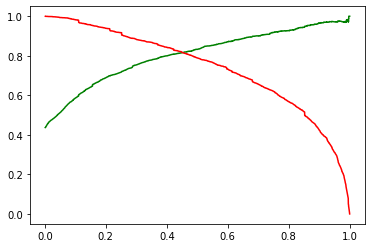

In [746]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [747]:
# Predicted probabilities on test data
y_pred = logsk.predict_proba(X_test[col])
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.061577
1,0.164732
2,0.287066
3,0.094478
4,0.977525


In [748]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
Prospect ID,
206,0
6441,0
4955,0
473,0
5602,1


In [749]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Churn_Prob
0,0,206,0.061577
1,0,6441,0.164732
2,0,4955,0.287066
3,0,473,0.094478
4,1,5602,0.977525


In [750]:
y_pred_final.columns

Index(['Converted', 'Prospect ID', 'Churn_Prob'], dtype='object')

In [751]:
y_pred_final.reindex(columns=['Prospect ID','Converted','Churn_Prob'])

,Prospect ID,Converted,Churn_Prob
0,206,0,0.061577
1,6441,0,0.164732
2,4955,0,0.287066
3,473,0,0.094478
4,5602,1,0.977525
5,4590,1,0.370127
6,5122,0,0.023356
7,7164,1,0.523751
8,5204,1,0.947793
9,4234,1,0.633974


In [753]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.4 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)
# Let's see the head
y_pred_final.head()

,Converted,Prospect ID,Churn_Prob,predicted
0,0,206,0.061577,0
1,0,6441,0.164732,0
2,0,4955,0.287066,0
3,0,473,0.094478,0
4,1,5602,0.977525,1


In [754]:
from sklearn import metrics

In [755]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Converted, y_pred_final.predicted )
confusion

array([[1113,  207],
       [ 154,  826]], dtype=int64)

In [756]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.8430434782608696

In [757]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

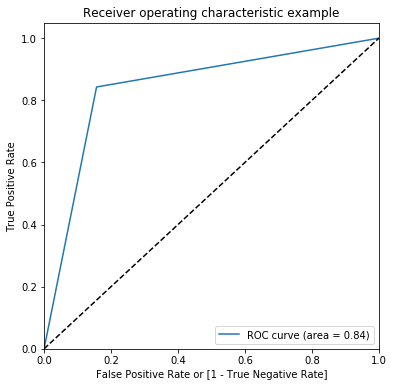

(array([0.        , 0.15681818, 1.        ]),
 array([0.        , 0.84285714, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [758]:
draw_roc(y_pred_final.Converted, y_pred_final.predicted)

In [759]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Churn_Prob))

'0.92'